**CROP YIELD ANALYSIS AND PREDICTION**
<br/>This notebook analyzes crop data to predict for better recommendation.

**Objectives:**<br/>
1.Load and explore the data<br/>
2.Perform data preprocessing<br/>
3.Build and test models<br/>
4.Evaluate and compare model performance<br/>






**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



In [9]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

**LOADING AND EXPLORING THE DATASET:**

In [10]:
crop_df = pd.read_csv(r'C:\Users\sopiy\Downloads\Crop_recommendation.csv')


In [11]:
crop_df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [12]:
crop_df.shape

(2200, 8)

In [13]:
crop_df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [14]:
# Check for missing and duplicated values
print(f'\nMissing values: {crop_df.isna().sum().sum()}')
print(f'Duplicated values: {crop_df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


In [15]:
print("\nDataset Information:")
print(crop_df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


**UNIQUE VALUE EXPLORATION**

In [16]:
numerical_columns = crop_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = crop_df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Categorical Columns: ['label']


In [17]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {crop_df[col].unique()}")


Column: label
Unique Values: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [18]:
numerical_columns = crop_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = crop_df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Categorical Columns: ['label']


In [19]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(crop_df.nunique())


Unique Values in Each Column:
N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64


In [20]:
print("\nStatistical Summary:")
display(crop_df.describe().T)


Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


**EXPLORATORY DATA ANALYSIS-EDA**

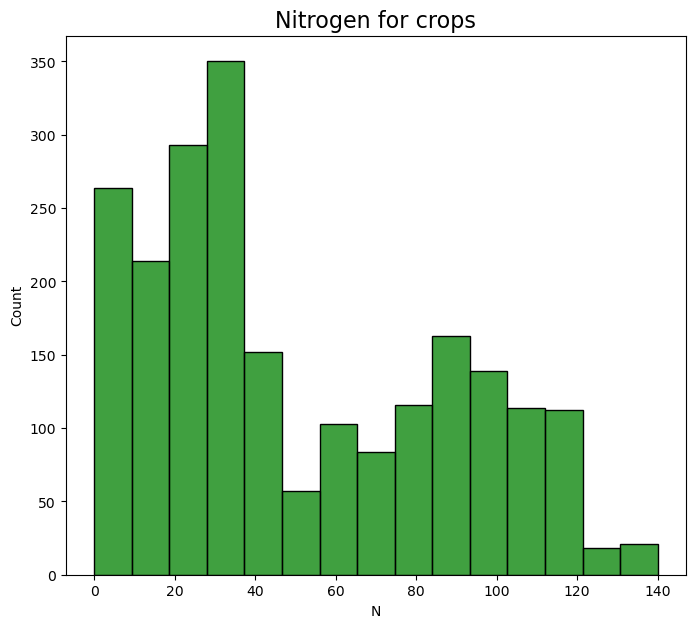

In [21]:
plt.figure(figsize=(8,7))
sns.histplot(x='N',data=crop_df,color='g');
plt.title("Nitrogen for crops",{'fontsize':16});

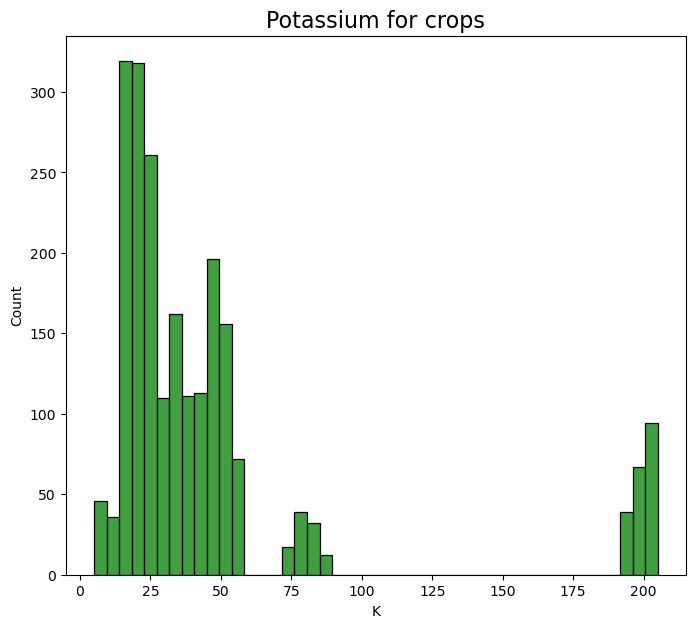

In [22]:
plt.figure(figsize=(8,7))
sns.histplot(x='K',data=crop_df,color='g');
plt.title("Potassium for crops",{'fontsize':16});

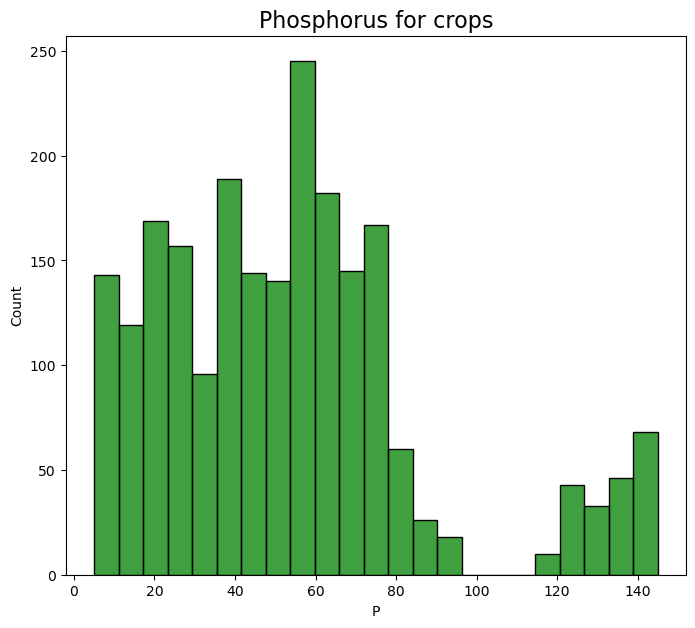

In [23]:
plt.figure(figsize=(8,7))
sns.histplot(x='P',data=crop_df,color='g');
plt.title("Phosphorus for crops",{'fontsize':16});

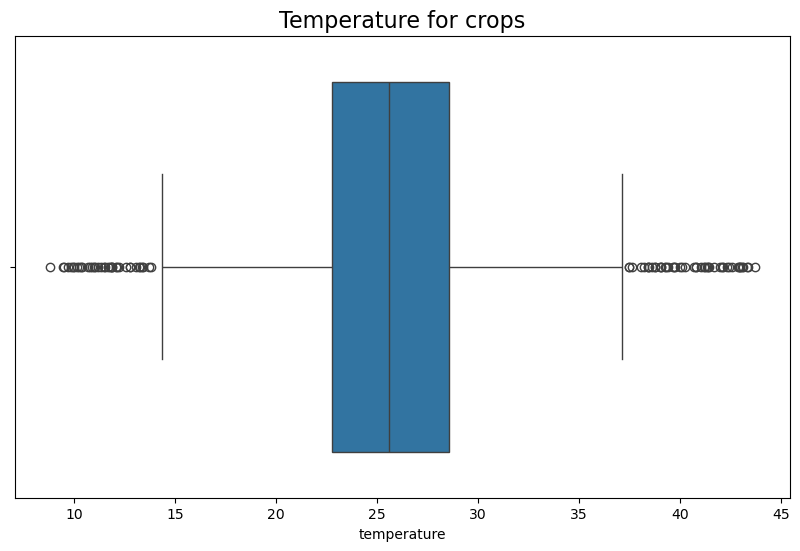

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x=crop_df.temperature);
plt.title("Temperature for crops",{'fontsize':16});

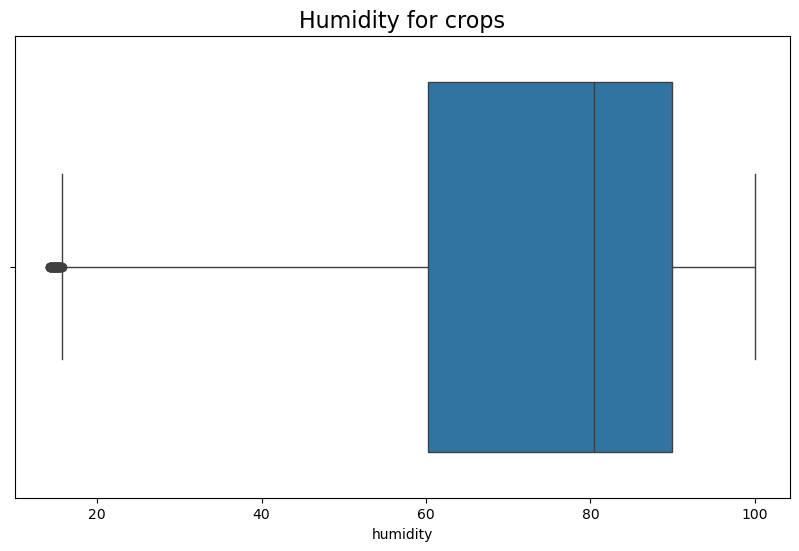

In [25]:
plt.figure(figsize=(10,6))
sns.boxplot(x=crop_df.humidity);
plt.title("Humidity for crops",{'fontsize':16});

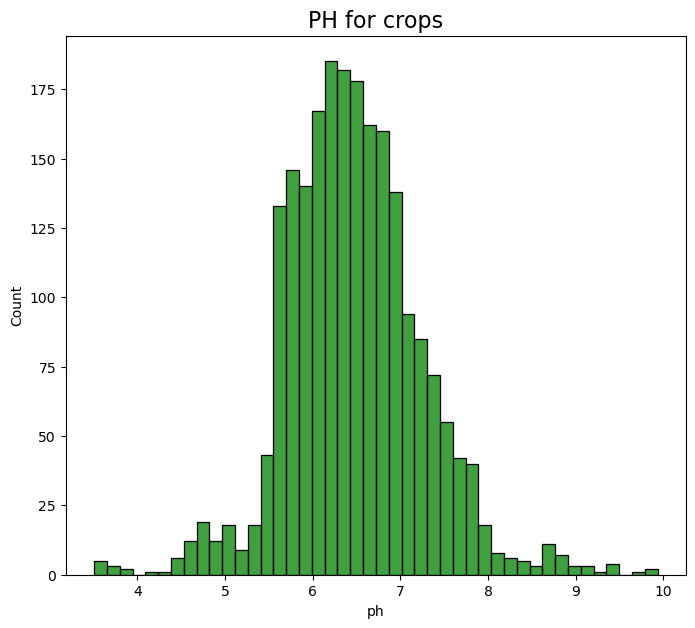

In [26]:
plt.figure(figsize=(8,7))
sns.histplot(x='ph',data=crop_df,color='g');
plt.title("PH for crops",{'fontsize':16});

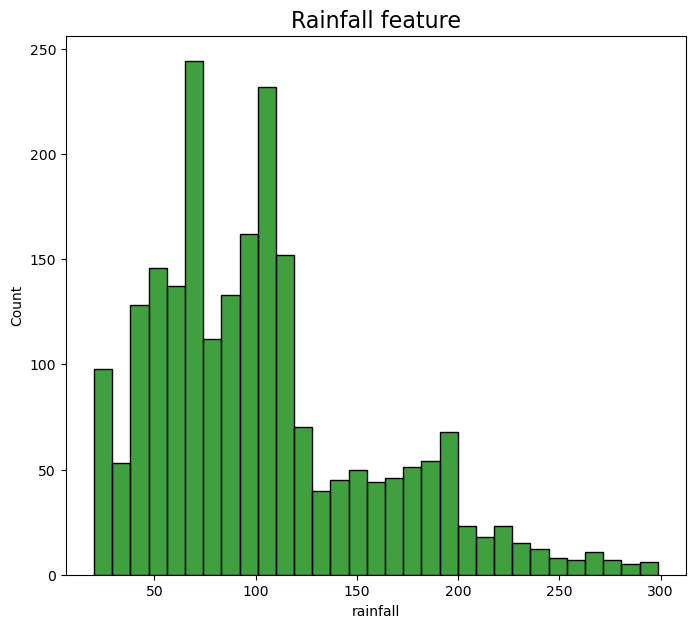

In [27]:
plt.figure(figsize=(8,7))
sns.histplot(x='rainfall',data=crop_df,color='g');
plt.title("Rainfall feature",{'fontsize':16});

**DATA PREPROCESSING**

In [39]:
crop_df['no_label'] = pd.Categorical(crop_df.label).codes

In [40]:
X = crop_df.drop(['label','no_label'],axis=1)
y = crop_df.no_label

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [42]:
X_train.head()  #feature scaling

,N,P,K,temperature,humidity,ph,rainfall
475,20,72,15,36.004158,56.013344,7.313517,134.859647
1482,117,25,54,28.682760,92.509693,6.150686,29.111877
1447,83,11,53,29.540972,92.917783,6.163921,21.965308
1677,37,18,12,10.270888,90.191477,7.401122,106.695520
89,91,50,40,20.824771,84.134188,6.462392,230.224222


In [43]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

**BUILDING MODEL**

In [44]:
models = {
    LogisticRegression(max_iter=500):'Logistic Regression',
    RandomForestClassifier():'Random Forest',
    SVC():'Support Vector Machine'
}
for m in models.keys():
    m.fit(X_train,y_train)
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_test,y_test)*100,"%")

Accuracy Score for Logistic Regression is :  96.5909090909091 %
Accuracy Score for Random Forest is :  99.54545454545455 %
Accuracy Score for Support Vector Machine is :  98.4090909090909 %


**random forest gives a higher accuracy compared to the other models.**

**HYPERPARAMETER TRAINING**

In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = rf.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        18
           8       0.94      0.94      0.94        17
           9       1.00      1.00      1.00        19
          10       1.00      1.00      1.00        18
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        18
          13       1.00      1.00      1.00        22
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        24
          16       1.00      1.00      1.00        21
          17       1.00    

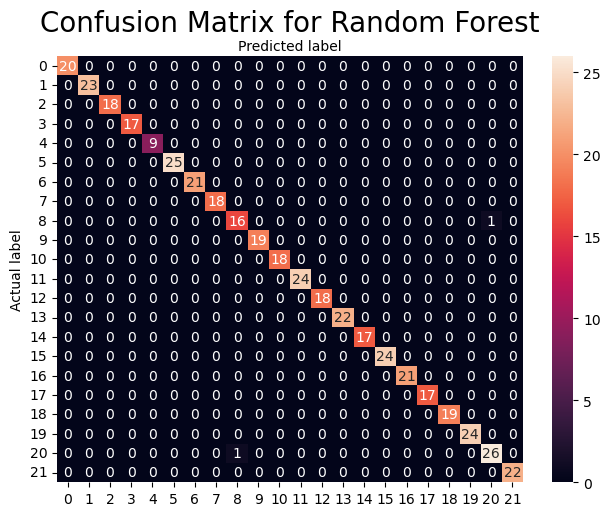

In [51]:
class_names = np.arange(0,21)
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
cnf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True,fmt = 'd')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title(f'Confusion Matrix for Random Forest', {'fontsize':20})
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

